In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(sc)

<SparkContext master=local[*] appName=PySparkShell>


In [3]:
print(sc.version)

2.3.2


In [4]:
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Taxi 2015").getOrCreate()

# Print my_spark
print(spark)

In [5]:

taxi=spark.read.csv('hdfs://localhost:9000/taxi/2015_Green_Taxi_Trip_Data.csv',header='true',encoding = 'UTF-8',dateFormat='yyyy-MM-dd HH:mm:ss',inferSchema ='true')

In [6]:
taxi.show(5)

+--------+--------------------+--------------------+------------------+---------+------------------+------------------+------------------+------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|vendorid|     pickup_datetime|    dropoff_datetime|Store_and_fwd_flag|rate_code|  Pickup_longitude|   Pickup_latitude| Dropoff_longitude|  Dropoff_latitude|Passenger_count|Trip_distance|Fare_amount|Extra|MTA_tax|Tip_amount|Tolls_amount|Ehail_fee|Improvement_surcharge|Total_amount|Payment_type|Trip_type|
+--------+--------------------+--------------------+------------------+---------+------------------+------------------+------------------+------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|       1|12/14/2015 09:08:...|12/14/2015 09:12:...|                 N|        1|-

In [7]:
taxi.count()

19233765

In [8]:
len(taxi.columns),taxi.columns

(21,
 ['vendorid',
  'pickup_datetime',
  'dropoff_datetime',
  'Store_and_fwd_flag',
  'rate_code',
  'Pickup_longitude',
  'Pickup_latitude',
  'Dropoff_longitude',
  'Dropoff_latitude',
  'Passenger_count',
  'Trip_distance',
  'Fare_amount',
  'Extra',
  'MTA_tax',
  'Tip_amount',
  'Tolls_amount',
  'Ehail_fee',
  'Improvement_surcharge',
  'Total_amount',
  'Payment_type',
  'Trip_type'])

In [9]:
taxi.printSchema()

root
 |-- vendorid: integer (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- Store_and_fwd_flag: string (nullable = true)
 |-- rate_code: integer (nullable = true)
 |-- Pickup_longitude: double (nullable = true)
 |-- Pickup_latitude: double (nullable = true)
 |-- Dropoff_longitude: double (nullable = true)
 |-- Dropoff_latitude: double (nullable = true)
 |-- Passenger_count: integer (nullable = true)
 |-- Trip_distance: double (nullable = true)
 |-- Fare_amount: double (nullable = true)
 |-- Extra: double (nullable = true)
 |-- MTA_tax: double (nullable = true)
 |-- Tip_amount: double (nullable = true)
 |-- Tolls_amount: double (nullable = true)
 |-- Ehail_fee: string (nullable = true)
 |-- Improvement_surcharge: double (nullable = true)
 |-- Total_amount: double (nullable = true)
 |-- Payment_type: integer (nullable = true)
 |-- Trip_type: integer (nullable = true)



In [10]:
summary=taxi.describe()

In [11]:
summary.show()

+-------+-------------------+--------------------+--------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+-------------------+---------+---------------------+------------------+------------------+------------------+
|summary|           vendorid|     pickup_datetime|    dropoff_datetime|Store_and_fwd_flag|         rate_code|   Pickup_longitude|   Pickup_latitude|  Dropoff_longitude|  Dropoff_latitude|   Passenger_count|     Trip_distance|       Fare_amount|              Extra|            MTA_tax|       Tip_amount|       Tolls_amount|Ehail_fee|Improvement_surcharge|      Total_amount|      Payment_type|         Trip_type|
+-------+-------------------+--------------------+--------------------+------------------+------------------+-------------------+------------------+-------------------+--------

In [12]:
sum=summary.toPandas()

In [13]:
print(sum)

  summary             vendorid         pickup_datetime  \
0   count             19233765                19233765   
1    mean   1.7810242560413938                    None   
2  stddev  0.41355214472701773                    None   
3     min                    1  01/01/2015 01:00:00 AM   
4     max                    2  12/31/2015 12:59:59 PM   

         dropoff_datetime Store_and_fwd_flag           rate_code  \
0                19233765           19233765            19233765   
1                    None               None  1.0995576269128795   
2                    None               None  0.6464661826108637   
3  01/01/2015 01:00:00 AM                  N                   1   
4  12/31/2015 12:59:59 PM                  Y                  99   

      Pickup_longitude     Pickup_latitude    Dropoff_longitude  \
0             19233765            19233765             19233765   
1    -73.8287285269631  40.690854690128674   -73.83246755015698   
2   2.8049667375507985  1.546499256509713

## Get the count data for VendorID and create a pie chart

In [14]:
#show the count in spark dataframe
taxi.groupby('vendorid').count().show()

+--------+--------+
|vendorid|   count|
+--------+--------+
|       1| 4211728|
|       2|15022037|
+--------+--------+



In [15]:
#convert to pandas dataframe
vendor=taxi.groupby('vendorid').count()
vendor=vendor.toPandas()

In [16]:
print(vendor)

   vendorid     count
0         1   4211728
1         2  15022037


In [17]:
#plot using plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)


table = ff.create_table(vendor)
plot(table, filename='vendor_table.html')
iplot(table, filename='vendor_table')

In [18]:
print(vendor['count'])

0     4211728
1    15022037
Name: count, dtype: int64


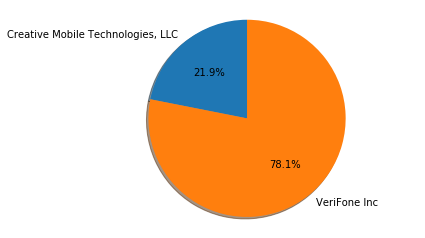

In [19]:
#create pie chart in matplot lib

labels=['Creative Mobile Technologies, LLC','VeriFone Inc']
sizes =vendor['count']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [20]:
#create pie chart in plotly
#plot using plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

labels=['Creative Mobile Technologies, LLC','VeriFone Inc']
sizes =vendor['count']

trace = go.Pie(labels=labels, values=sizes)

layout = go.Layout(title='Pie chart of vendor count')
fig = go.Figure(data=[trace], layout=layout)

plot(fig, filename='vendor_pie.html')
iplot(fig, filename='vendor_pie')

## Get the count data for monthly trend and plot a line chart

In [21]:
#convert pickup_datetime into datetime
from datetime import datetime
from pyspark.sql.functions import col,udf
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import date_format

myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df = taxi.withColumn('Date_time', myfunc(col('pickup_datetime'))).drop('pickup_datetime')
df.select(df['Date_time']).show(5)


+-------------------+
|          Date_time|
+-------------------+
|2015-12-14 09:08:20|
|2015-04-15 02:06:42|
|2015-05-15 15:54:43|
|2015-07-07 06:41:03|
|2015-10-06 00:47:59|
+-------------------+
only showing top 5 rows



In [22]:
from pyspark.sql.functions import month
monthdf = df.withColumn('Month',month('Date_time'))

In [23]:
monthdf.select("Month").groupBy("Month").count().show()

+-----+-------+
|Month|  count|
+-----+-------+
|   12|1608290|
|    1|1508501|
|    6|1638868|
|    3|1722574|
|    5|1786848|
|    9|1494926|
|    4|1664394|
|    8|1532343|
|    7|1541671|
|   10|1630536|
|   11|1529984|
|    2|1574830|
+-----+-------+



In [24]:
#convert to pandas
monthCounts=monthdf.select("Month").groupBy("Month").count()
monthCounts=monthCounts.toPandas()
print(monthCounts)

    Month    count
0      12  1608290
1       1  1508501
2       6  1638868
3       3  1722574
4       5  1786848
5       9  1494926
6       4  1664394
7       8  1532343
8       7  1541671
9      10  1630536
10     11  1529984
11      2  1574830


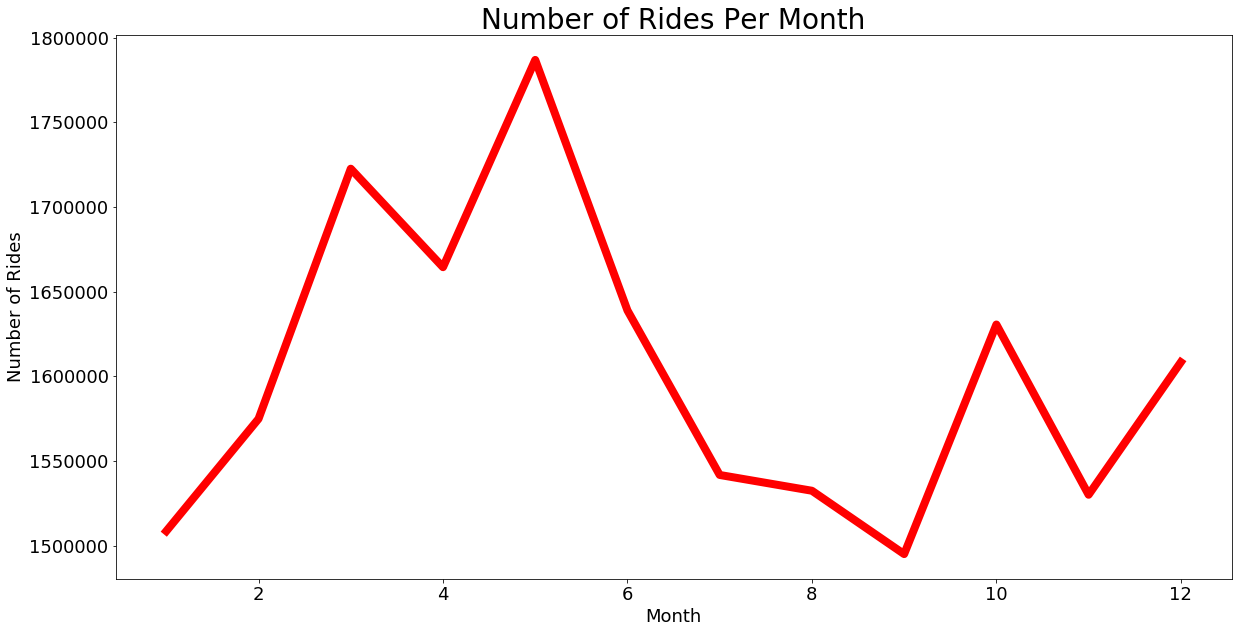

In [25]:
#plot using matplotlib
from pyspark.sql.functions import month
monthdf = df.withColumn('Month',month('Date_time'))
monthCounts = monthdf.select("Month").groupBy("Month").count()
monthCounts = monthCounts.collect()
months = [item[0] for item in monthCounts]
count = [item[1] for item in monthCounts]
rides_per_month = {"month":months, "rides_count": count}
rides_per_month = pd.DataFrame(rides_per_month)
rides_per_month = rides_per_month.sort_values(by = "month")
rides_per_month.plot(figsize = (20,10), kind = "line", x = "month", y = "rides_count", 
                      color = "red", linewidth = 8, legend = False)
plt.xlabel("Month", fontsize = 18)
plt.ylabel("Number of Rides", fontsize = 18)
plt.title("Number of Rides Per Month", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [26]:
#plot using plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


months = [item[0] for item in monthCounts]
count = [item[1] for item in monthCounts]
rides_per_month = {"month":months, "rides_count": count}
rides_per_month = pd.DataFrame(rides_per_month)
rides_per_month = rides_per_month.sort_values(by = "month")
rides_per_month.head()

data = [
    go.Scatter(
        x=rides_per_month['month'], # assign x as the dataframe column 'x'
        y=rides_per_month['rides_count']
    )
]

layout = go.Layout(title='Number of Rides Per Month')
fig = go.Figure(data=data, layout=layout)

plot(fig, filename='basic-line.html')
iplot(fig, filename='basic-line')

## Get the count data for dailytrend and plot a line chart

In [27]:
from pyspark.sql.functions import dayofweek
from pyspark.sql.types import IntegerType
from datetime import datetime
from pyspark.sql.functions import col,udf
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import date_format

daydf = df.select('Date_time', date_format('Date_time', 'u').alias('dow_number').cast(IntegerType()), date_format('Date_time', 'E').alias('dow_string'))
daycounts = daydf.groupBy("dow_number","dow_string").count()
daycounts = daycounts.collect()

In [28]:
print(daycounts)

[Row(dow_number=7, dow_string='Sun', count=2958266), Row(dow_number=2, dow_string='Tue', count=2291605), Row(dow_number=3, dow_string='Wed', count=2462354), Row(dow_number=1, dow_string='Mon', count=2225759), Row(dow_number=4, dow_string='Thu', count=2739146), Row(dow_number=5, dow_string='Fri', count=3054902), Row(dow_number=6, dow_string='Sat', count=3501733)]


In [29]:
days_number = [item[0] for item in daycounts]
day_name = [item[1] for item in daycounts]
count = [item[2] for item in daycounts]

In [30]:
days_number


[7, 2, 3, 1, 4, 5, 6]

In [31]:
day_name

['Sun', 'Tue', 'Wed', 'Mon', 'Thu', 'Fri', 'Sat']

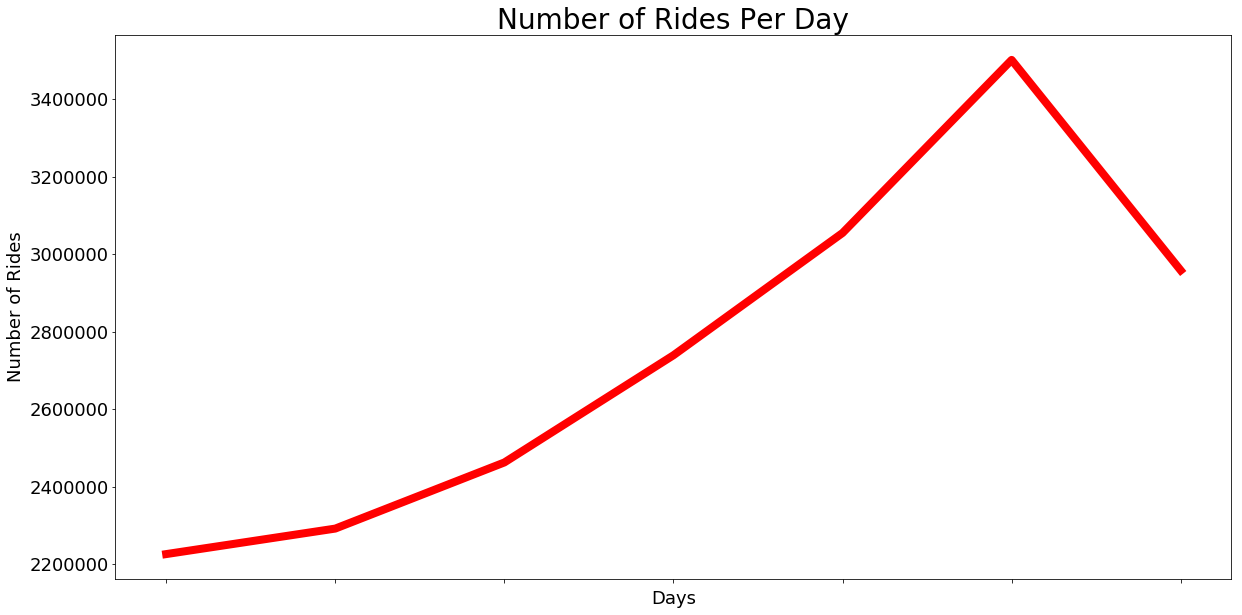

In [32]:
rides_per_day = {"days":day_name, "rides_count": count, "day_number":days_number}
rides_per_day = pd.DataFrame(rides_per_day)
rides_per_day = rides_per_day.sort_values(by = "day_number",ascending  = True)
rides_per_day.plot(figsize = (20,10), kind = "line", x = "days", y = "rides_count", 
                      color = "red", linewidth = 8, legend = False)
plt.xlabel("Days", fontsize = 18)
plt.ylabel("Number of Rides", fontsize = 18)
plt.title("Number of Rides Per Day", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [33]:
from pyspark.sql.functions import dayofweek
from pyspark.sql.functions import date_format
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)



days_number = [item[0] for item in daycounts]
day_name = [item[1] for item in daycounts]
count = [item[2] for item in daycounts]

rides_byDay = {"days" : day_name, "count": count,"day_number": days_number}
rides_byDay = pd.DataFrame(rides_byDay)
rides_byDay = rides_byDay.sort_values(by = "day_number", ascending  = True)
rides_byDay.head()

data = [
    go.Scatter(
        x=rides_byDay['days'], # assign x as the dataframe column 'x'
        y=rides_byDay['count']
    )
]

layout = go.Layout(title='Number of Rides Per Day')
fig = go.Figure(data=data, layout=layout)

plot(fig, filename='line_daily.html')
iplot(fig, filename='line_daily')

## Get the count data for hourly trend and plot a line chart

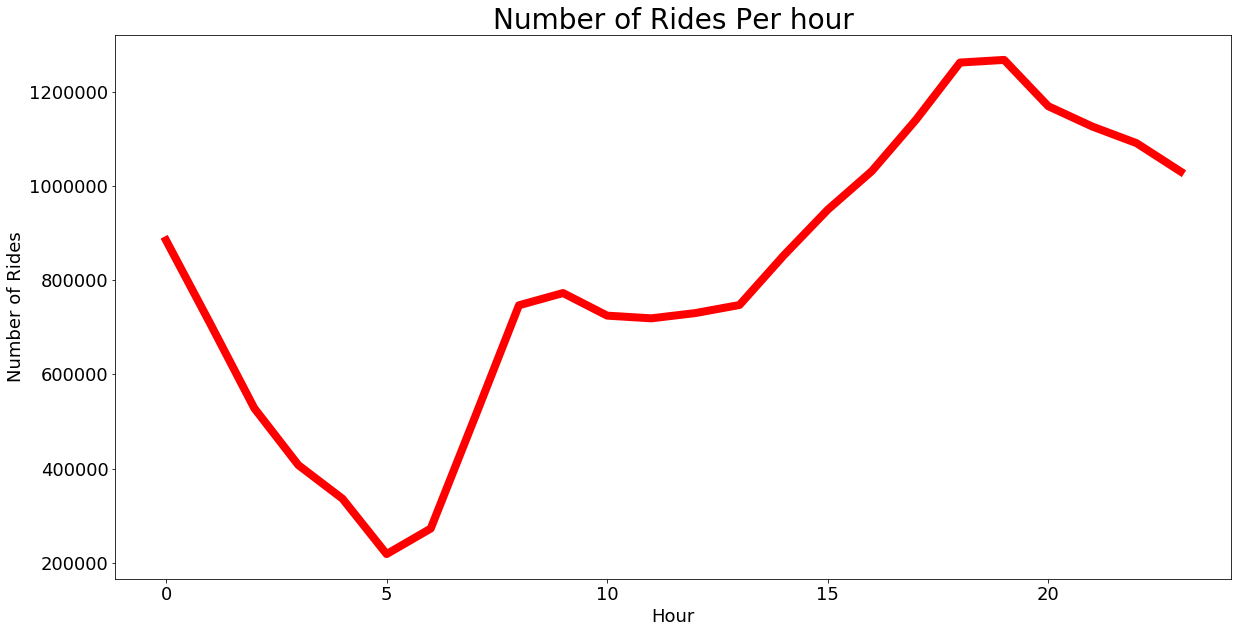

In [34]:
from pyspark.sql.functions import hour
from pyspark.sql.types import IntegerType
from datetime import datetime
from pyspark.sql.functions import col,udf
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import date_format

hourdf = df.withColumn('Hour',hour('Date_time').cast(IntegerType()))
hourdfcount = hourdf.select("Hour").groupBy("Hour").count()
hourdfcount = hourdfcount.collect()
hour_val = [item[0] for item in hourdfcount]
count = [item[1] for item in hourdfcount]

rides_per_hour = {"hour":hour_val, "rides_count": count}
rides_per_hour = pd.DataFrame(rides_per_hour)
rides_per_hour = rides_per_hour.sort_values(by = "hour", ascending  = True)
rides_per_hour.plot(figsize = (20,10), kind = "line", x = "hour", y = "rides_count", 
                      color = "red", linewidth = 8, legend = False)
plt.xlabel("Hour", fontsize = 18)
plt.ylabel("Number of Rides", fontsize = 18)
plt.title("Number of Rides Per hour", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [35]:
#plot using plotly
from pyspark.sql.functions import hour
from pyspark.sql.types import IntegerType
from datetime import datetime
from pyspark.sql.functions import col,udf
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import date_format
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

hourdf = df.withColumn('Hour',hour('Date_time').cast(IntegerType()))
hourdfcount = hourdf.select("Hour").groupBy("Hour").count()
hourdfcount = hourdfcount.collect()
hour_val = [item[0] for item in hourdfcount]
count = [item[1] for item in hourdfcount]
hour_val = [item[0] for item in hourdfcount]
count = [item[1] for item in hourdfcount]

rides_per_hour = {"hour":hour_val, "rides_count": count}
rides_per_hour = pd.DataFrame(rides_per_hour)
rides_per_hour = rides_per_hour.sort_values(by = "hour", ascending  = True)

data = [
    go.Scatter(
        x=rides_per_hour['hour'], # assign x as the dataframe column 'x'
        y=rides_per_hour['rides_count']
    )
]

layout = go.Layout(title='Number of Rides by time hour')
fig = go.Figure(data=data, layout=layout)

plot(fig, filename='hourly_trend.html')
iplot(fig, filename='hourly_trend')

## Get the count data for payment type and plot a bar chart

In [36]:
#convert to pandas dataframe
payment_type=taxi.groupby('Payment_type').count()
payment_type=payment_type.toPandas()

In [37]:
print(payment_type)

   Payment_type     count
0             1   8879600
1             3     64508
2             5       959
3             4     61267
4             2  10227431


In [38]:
payment_type_rename=payment_type.sort_values(by='Payment_type')
print(payment_type_rename)

   Payment_type     count
0             1   8879600
4             2  10227431
1             3     64508
3             4     61267
2             5       959


In [39]:
list=['Credit card',' Cash','No charge','Dispute','Unknown']
payment_type_rename.Payment_type=list
print(payment_type_rename)
payment_type_rename=payment_type_rename
payment_type_rename=payment_type_rename.sort_values(by='count',ascending=False)
print(payment_type_rename)

  Payment_type     count
0  Credit card   8879600
4         Cash  10227431
1    No charge     64508
3      Dispute     61267
2      Unknown       959
  Payment_type     count
4         Cash  10227431
0  Credit card   8879600
1    No charge     64508
3      Dispute     61267
2      Unknown       959


In [40]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = [
    go.Bar(
        x=payment_type_rename['Payment_type'], # assign x as the dataframe column 'x'
        y=payment_type_rename['count']        
    )
]
layout = go.Layout(title='Bar plot of payment type count')
fig = go.Figure(data=data, layout=layout)
plot(fig,filename='payment_type.html')
iplot(fig,filename='payment_type')

## Trip type

In [41]:
#show the count in spark dataframe
Triptype=taxi.groupby('Trip_type').count()
#convert to pandas dataframe
Triptype=Triptype.toPandas()


In [42]:
Triptype.dropna(how='any', inplace=True)
print(Triptype)

   Trip_type     count
1        1.0  18791242
2        2.0    442451


In [43]:
#create pie chart in plotly
#plot using plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

labels=['Street-hail','Dispatch']
sizes =Triptype['count']

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='Pie chart of trip type count')

fig = go.Figure(data=[trace], layout=layout)
plot(fig, filename='Triptype.html')
iplot(fig, filename='Triptype')

# Statistical Analysis data modelling

In [6]:
#filtering illogical value
taxi=taxi.filter(taxi.Tip_amount>0)
taxi=taxi.filter(taxi.Total_amount>0)
taxi=taxi.filter(taxi.Fare_amount>0)
taxi=taxi.filter(taxi.Trip_distance>0)
taxi.count()

7534935

## Tip amount analysis 

In [45]:
tips=taxi.describe('Tip_amount')

In [46]:
tips.show()

+-------+------------------+
|summary|        Tip_amount|
+-------+------------------+
|  count|           7534935|
|   mean| 3.018129945379967|
| stddev|3.7595368223638412|
|    min|              0.01|
|    max|           2017.73|
+-------+------------------+



In [47]:
#drop data below 0 as not logic tips to be below 0
filter_tips=taxi.filter(taxi.Tip_amount>0)
filter_tips=filter_tips.describe('Tip_amount')

In [48]:
filter_tips.show()

+-------+------------------+
|summary|        Tip_amount|
+-------+------------------+
|  count|           7534935|
|   mean| 3.018129945379967|
| stddev|3.7595368223638412|
|    min|              0.01|
|    max|           2017.73|
+-------+------------------+



In [49]:
filter_tips=filter_tips.toPandas()
print(filter_tips)

  summary          Tip_amount
0   count             7534935
1    mean   3.018129945379967
2  stddev  3.7595368223638412
3     min                0.01
4     max             2017.73


In [50]:
#plot using plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)


table = ff.create_table(filter_tips)
plot(table, filename='filter_tips.html')
iplot(table, filename='filter_tips')

## Trip distance analysis 

In [7]:
trip=taxi.describe('Trip_distance')
trip.show()

+-------+------------------+
|summary|     Trip_distance|
+-------+------------------+
|  count|           7534935|
|   mean|3.4520599129256024|
| stddev| 3.202511952299445|
|    min|              0.01|
|    max|             586.1|
+-------+------------------+



In [8]:
#drop data below 0 as not logic tips to be below 0
filter_trip=taxi.filter(taxi.Trip_distance>0.0)

In [9]:
trip=filter_trip.describe('Trip_distance')
trip.show()

+-------+------------------+
|summary|     Trip_distance|
+-------+------------------+
|  count|           7534935|
|   mean|3.4520599129256024|
| stddev| 3.202511952299445|
|    min|              0.01|
|    max|             586.1|
+-------+------------------+



In [10]:
trip=trip.toPandas()
print(trip)

  summary       Trip_distance
0   count             7534935
1    mean  3.4520599129256024
2  stddev   3.202511952299445
3     min                0.01
4     max               586.1


In [11]:
#plot using plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)


table = ff.create_table(trip)
plot(table, filename='Trip_distance.html')
iplot(table, filename='Trip_distance')